In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# 1. Wrangle Data

## 1.2. Import

In [ ]:
# Import 
import pandas as pd
df = pd.read_csv(DATA_PATH+'elections/bread_peace_voting.csv', index_col='Year')

## EDA

In [ ]:
df

,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
Year,,,,,
1952,Stevenson,Eisenhower,2.40,190,44.60
1956,Eisenhower,Stevenson,2.89,0,57.76
1960,Nixon,Kennedy,0.85,0,49.91
1964,Johnson,Goldwater,4.21,1,61.34
1968,Humphrey,Nixon,3.02,146,49.60
1972,Nixon,McGovern,3.62,0,61.79
1976,Ford,Carter,1.08,2,48.95
1980,Carter,Reagan,-0.39,0,44.70
1984,Reagan,Mondale,3.86,0,59.17


In [ ]:
df.describe()

,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
count,17.000000,17.000000,17.000000
mean,1.791765,21.588235,51.828235
std,1.419812,55.767440,5.510739
min,-0.390000,0.000000,44.600000
25%,0.850000,0.000000,48.200000
50%,1.720000,0.000000,50.270000
75%,2.890000,5.000000,54.740000
max,4.210000,190.000000,61.790000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1952 to 2016
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Incumbent Party Candidate                  17 non-null     object 
 1   Other Candidate                            17 non-null     object 
 2   Average Recent Growth in Personal Incomes  17 non-null     float64
 3   US Military Fatalities per Million         17 non-null     int64  
 4   Incumbent Party Vote Share                 17 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 816.0+ bytes


In [ ]:
incomes = 'Average Recent Growth in Personal Incomes'
fatalities = 'US Military Fatalities per Million'
vote_share = 'Incumbent Party Vote Share'

Is there a linear relationship between incomes and votes?

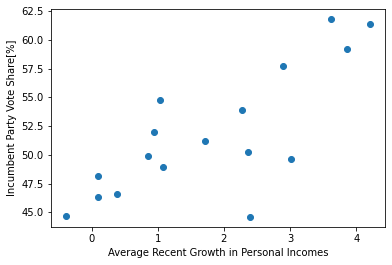

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df[incomes], df[vote_share])
plt.xlabel(incomes)
plt.ylabel(vote_share  + '[%]');

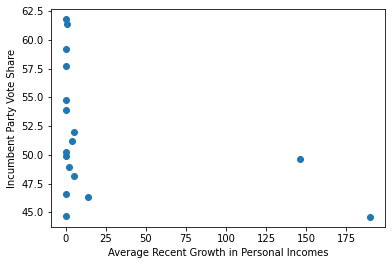

In [ ]:
plt.scatter(df[fatalities], df[vote_share])
plt.xlabel(incomes)
plt.ylabel(vote_share);

# 2. Split Data

## 2.1 Split our **target vector** from our **feature matrix**

In [ ]:
y = df[vote_share] # 1D 
X = df[[incomes, fatalities]] # 2D

In [ ]:
X.head()

,Average Recent Growth in Personal Incomes,US Military Fatalities per Million
Year,,
1952,2.40,190
1956,2.89,0
1960,0.85,0
1964,4.21,1
1968,3.02,146


## 2.2. Split our data into **training** and **test** sets

Two strategies:

- Random train-test split using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Generally we use 80% of the data for training, and 20% of the data for testing.
- If you have **timeseries**, then you need to do a "cutoff" split.

In [ ]:
# Train on data before 2008 and then test data from 2008 to present 
cutoff = 2008

mask = X.index < 2008

In [ ]:
X_train, y_train = X.loc[mask], y.loc[mask]
X_test , y_test = X.loc[~mask], y.loc[~mask]

In [ ]:
X_test

,Average Recent Growth in Personal Incomes,US Military Fatalities per Million
Year,,
2008,0.10,14
2012,0.95,5
2016,0.10,5


In [ ]:
assert len(X_train) + len(X_test) == len(df)

# Establish Baseline

- **Q**: Is this a regression or a classification problem?
- **A**: Regression

In [ ]:
# we are trying to predict a quantitative continious data (regression)
from sklearn.metrics import mean_absolute_error
y_pred = [y_train.mean()] * len(y_train)
f'Baseline MAE {mean_absolute_error(y_pred, y_train)}'

'Baseline MAE 4.846938775510204'

In [ ]:
X_train.shape, y_train.shape

((14, 2), (14,))

ValueError: ignored

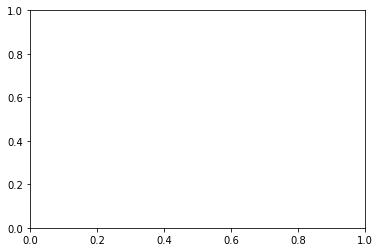

In [ ]:

# have to skip over this since X_train is 2D and y_pred is 1D so the scatter does not know how to plot
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color = 'grey', label = 'Baseline Model')
plt.xlabel(incomes)
plt.ylabel(vote_share  + '[%]');
plt.legend()

# Build Model

To start, let's use one feature only.

In [ ]:
# Step 1: import predictor class
from sklearn.linear_model import LinearRegression

# Step 2: Instantiate the class --> object
model = LinearRegression()

# Step 3: Fitting the training data to the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Check Metrics

## Mean Absolute Error

In [ ]:
f'Training MAE {mean_absolute_error(y_train, model.predict(X_train))}' , f'Test MAE {mean_absolute_error(y_test, model.predict(X_test))}'

('Training MAE 1.3303221006874268', 'Test MAE 1.6341722692537293')

## Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

print(f'TrainingRMSE:  {mean_squared_error(y_train,model.predict(X_train), squared = False)}')
print(f'TrainingRMSE:  {mean_squared_error(y_test,model.predict(X_test), squared = False)}')

TrainingRMSE:  3.6773568396257406
TrainingRMSE:  2.180652086836372


## $R^2$

TL; DR: Usually ranged between 0 (bad), 1(good)

In [ ]:
from ipywidgets import interactive, IntSlider, FloatSlider
from math import floor, ceil
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

class BruteForceRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, m=0, b=0):
        self.m = m
        self.b = b
        self.mean = 0
        
    def fit(self, X, y):
        self.mean = np.mean(y)
        return self
    
    def predict(self, X, return_mean=True):
        if return_mean:
            return [self.mean] * len(X)
        else:
            return X * self.m + self.b

def plot(slope, intercept):
    # Assign data to variables
    x = df['Average Recent Growth in Personal Incomes']
    y = df['Incumbent Party Vote Share']
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    
    # Set ax limits
    mar = 0.2
    x_lim = floor(x.min() - x.min()*mar), ceil(x.max() + x.min()*mar)
    y_lim = floor(y.min() - y.min()*mar), ceil(y.max() + y.min()*mar)
    
    # Instantiate and train model
    bfr = BruteForceRegressor(slope, intercept)
    bfr.fit(x, y)
    
    # ax1   
    ## Plot data
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax1.scatter(x, y)
    
    ## Plot base model
    ax1.axhline(bfr.mean, color='orange', label='baseline model')
    
    ## Plot residual lines
    y_base_pred = bfr.predict(x)
    ss_base = mean_squared_error(y, y_base_pred) * len(y)
    for x_i, y_i, yp_i in zip(x, y, y_base_pred):
        ax1.plot([x_i, x_i], [y_i, yp_i], 
                 color='gray', linestyle='--', alpha=0.75)
    
    ## Formatting
    ax1.legend()
    ax1.set_title(f'Sum of Squares: {np.round(ss_base, 2)}')
    ax1.set_xlabel('Growth in Personal Incomes')
    ax1.set_ylabel('Incumbent Party Vote Share [%]')

    # ax2

    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ## Plot data
    ax2.scatter(x, y)
    
    ## Plot model
    x_model = np.linspace(*ax2.get_xlim(), 10)
    y_model = bfr.predict(x_model, return_mean=False)
    ax2.plot(x_model, y_model, color='green', label='our model')
    for x_coord, y_coord in zip(x, y):
        ax2.plot([x_coord, x_coord], [y_coord, x_coord * slope + intercept], 
                 color='gray', linestyle='--', alpha=0.75)   
    
    ss_ours = mean_squared_error(y, bfr.predict(x, return_mean=False)) * len(y)
    
    ## Formatting
    ax2.legend()
    ax2.set_title(f'Sum of Squares: {np.round(ss_ours, 2)}')
    ax2.set_xlabel('Growth in Personal Incomes')
    ax2.set_ylabel('Incumbent Party Vote Share [%]')

y = df['Incumbent Party Vote Share']
slope_slider = FloatSlider(min=-5, max=5, step=0.5, value=0)
intercept_slider = FloatSlider(min=int(y.min()), max=y.max(), step=2, value=y.mean())
    
interactive(plot, slope=slope_slider, intercept=intercept_slider)

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0, step=0.5), FloatSlider(va…

In [ ]:
from sklearn.metrics import r2_score

print(f'Training R Square {r2_score(y_train, model.predict(X_train))}')
print(f'Test R Square {r2_score(y_test, model.predict(X_test))}')

Training R Square 0.8739958896016927
Test R Square 0.3792995526663848


In [ ]:
print(f'Training Model Score {model.score(X_train,y_train)}')
print(f'Test Model Score {model.score(X_test,y_test)}')

Training Model Score 0.8739958896016927
Test Model Score 0.3792995526663848


Interlude: Multiple Linear Regression

# And finally... Multiple Linear Regression

  # Explain Model